In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
# IMPORT THE FILES 

In [3]:
# Import the integrated review file for OH Yelp data
reviews_combined = pd.read_csv('./reviews_users_business_oh.csv') 

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Import the user file for OH Yelp data
users = pd.read_csv('./users_oh.csv') 

In [5]:
# Import the integrated buisness file for OH Yelp data
business = pd.read_csv('./business_oh.csv') 

In [6]:
# CLEAN THE REVIEW DATATA FRAME 

In [7]:
# check the shape
reviews_combined.shape

(321345, 42)

In [8]:
reviews_combined.head(1)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments
0,0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,...,2013-06-05 18:43:58,2018-05-28 22:26:53,1818 days 03:42:55.000000000,4.98,54,13,0,None,0,0


In [9]:
reviews = reviews_combined.drop(reviews_combined.columns[0], axis=1)
reviews.head(1)                                           

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,earliest_review,latest_review,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,2013-06-05 18:43:58,2018-05-28 22:26:53,1818 days 03:42:55.000000000,4.98,54,13,0,None,0,0


In [10]:
reviews.dtypes

review_id                        object
user_id                          object
business_id                      object
stars                             int64
useful                            int64
funny                             int64
cool                              int64
text                             object
date                             object
datetime                         object
year                              int64
is_it_a_one                       int64
is_it_a_five                      int64
is_it_a_one_or_two                int64
is_it_a_four_or_five              int64
is_it_a_one_or_five               int64
name_business_id                 object
city                             object
state                            object
latitude                        float64
longitude                       float64
stars_for_business_id           float64
review_count_for_business_id      int64
is_open                           int64
lat_lon_cluster                   int64


In [11]:
# ADD WORD COUNT FOR REVIEW LENGTH TO THE INTEGRATED REVIEW DATAFRAME 

In [12]:
# Add word count as a separate column 
reviews['totalwords'] = reviews['text'].str.split().str.len()

In [13]:
# Check for any correlations for totalwords
abs(reviews.corr()['totalwords']).sort_values(ascending=False)

totalwords                      1.000000
useful                          0.290349
funny                           0.189547
cool                            0.176339
stars                           0.172301
is_it_a_five                    0.164583
is_it_a_four_or_five            0.164003
is_it_a_one_or_two              0.135589
friend_count                    0.127337
year                            0.123099
review_count_user_id            0.118386
is_it_a_one_or_five             0.096155
is_it_a_one                     0.093568
useful_business_id              0.064366
biz_star_mean                   0.063634
stars_for_business_id           0.062829
biz_review_count                0.044432
review_count_for_business_id    0.044113
is_open                         0.039818
biz_star_min                    0.036979
biz_star_std                    0.036761
latitude                        0.033219
biz_star_max                    0.023222
earliest_to_latest_years        0.016413
lat_lon_cluster 

In [14]:
# FORMAT ELITE COLUMN INTO A BINARY 

In [15]:
reviews.elite_no_nan.value_counts().sort_values()

2014,2015,2017                                  1
2010,2011,2012,2013,2015,2016,2017,2018         1
2010,2011,2018                                  1
2009,2010,2011,2012,2017                        1
2010,2011,2012,2016,2017,2018                   1
                                            ...  
2015,2016,2017,2018                          5327
2016,2017,2018                               7098
2017,2018                                    7604
2018                                         8897
0                                          234147
Name: elite_no_nan, Length: 256, dtype: int64

In [16]:
# 1. Create a new column indicating binary result of whther a user is elite or not
def elite_or_not (i):
    if i == '0':
        return 0
    else:
        return 1
reviews['elite_yes_no'] = reviews['elite_no_nan'].apply(elite_or_not)

In [17]:
# USER REVIEW COUNT RANGES

In [18]:
# Create a new dataframe counting the number of reviews by user
users_review_count = pd.DataFrame(reviews.groupby('user_id').user_id.count())
users_review_count.columns = ['user_review_count']
users_review_count.reset_index(level=0, inplace=True)
# break out by ranges of the number of reviews written per user
ranges = [0,1,2,5,10,20,50,100,200,500,1000, 5000, 15000]
users_review_count.groupby(pd.cut(users_review_count.user_review_count, ranges)).count()

,user_id,user_review_count
user_review_count,,
"(0, 1]",53959,53959
"(1, 2]",14516,14516
"(2, 5]",13682,13682
"(5, 10]",5704,5704
"(10, 20]",2812,2812
"(20, 50]",1362,1362
"(50, 100]",399,399
"(100, 200]",141,141
"(200, 500]",40,40


In [19]:
# USER SEGMENT 1: ELITE 

ELITE
- The number of Elite reviewers as a percentage of total reviewers: 6.7%
- Number of reviews from Elite reviewers as a % of total: 27.1%
- Aggregate percentage of reviews written by Elite users that is a '1' star rating : 4.3%
- Aggregate percentage of reviews written by Elite users that is either a '4' or '5': 70.2%


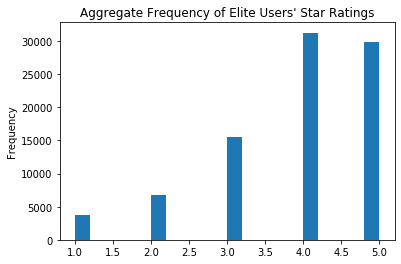

In [20]:
print('ELITE')
print('- The number of Elite reviewers as a percentage of total reviewers: ' + (users.elite.count() / len(users)*100).astype(float).round(1).astype(str) + '%')
print('- Number of reviews from Elite reviewers as a % of total: ' + np.around((reviews.elite_yes_no.sum() / reviews.elite_yes_no.count())*100, decimals = 1).astype(str) + '%')
elite = reviews[reviews.elite_yes_no == 1]
print("- Aggregate percentage of reviews written by Elite users that is a '1' star rating : " + np.around((elite['is_it_a_one'].sum() / elite['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Aggregate percentage of reviews written by Elite users that is either a '4' or '5': " + np.around((elite['is_it_a_four_or_five'].sum() / elite['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
elite['stars'].plot(kind='hist', bins=20, title = "Aggregate Frequency of Elite Users' Star Ratings");

In [21]:
# USER SEGMENT 2: NOT ELITE 

NOT ELITE
- The number of non Elite reviewers as a percentage of total reviewers: 93.3%
- Number of reviews from non Elite reviewers as a % of total: 72.9%
- Aggregate percentage of reviews written by non Elite users that is a '1' star rating : 18.7%
- Aggregate percentage of reviews written by non Elite users that is either a '4' or '5': 62.6%


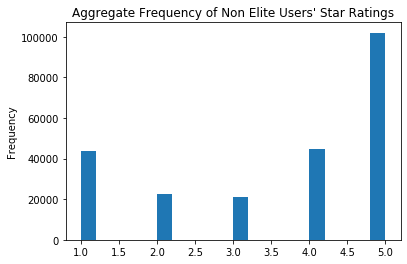

In [22]:
print('NOT ELITE')
print('- The number of non Elite reviewers as a percentage of total reviewers: ' + ((users.user_id.count() - users.elite.count()) / len(users)*100).astype(float).round(1).astype(str) + '%')
print('- Number of reviews from non Elite reviewers as a % of total: ' + np.around(((reviews.elite_yes_no.count() -reviews.elite_yes_no.sum()) / reviews.elite_yes_no.count())*100, decimals = 1).astype(str) + '%')
non_elite = reviews[reviews.elite_yes_no != 1]
print("- Aggregate percentage of reviews written by non Elite users that is a '1' star rating : " + np.around((non_elite['is_it_a_one'].sum() / non_elite['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Aggregate percentage of reviews written by non Elite users that is either a '4' or '5': " + np.around((non_elite['is_it_a_four_or_five'].sum() / non_elite['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
non_elite['stars'].plot(kind='hist', bins=20, title = "Aggregate Frequency of Non Elite Users' Star Ratings");

In [23]:
# USER SEGMENT 3: USERS WHO HAVE WRITTEN ONLY ONE REVIEW

USERS WHO HAVE WRITTEN ONLY ONE REVIEW
- The number of users who have written only one review as a percentage of total reviewers: 58.3%
- Number of reviews from users who have written only one review as a % of total: 16.8%
- Agg. percentage of reviews written by users who have written only one review that is a '1' star rating : 35.7%
- Agg. percentage of reviews written by users who have written only one review that is either a '4' or '5': 52.7%


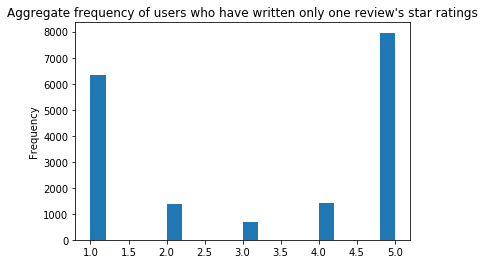

In [24]:
print('USERS WHO HAVE WRITTEN ONLY ONE REVIEW')
print('- The number of users who have written only one review as a percentage of total reviewers: ' + str(round(len(users_review_count[users_review_count.user_review_count == 1])/ len(users_review_count)*100, 1)) + '%')
print('- Number of reviews from users who have written only one review as a % of total: ' + str(round(len(users_review_count[users_review_count.user_review_count == 1]) / reviews.user_id.count()*100, 1)) + '%')
user_one_review = reviews[reviews.review_count_user_id == 1]
print("- Agg. percentage of reviews written by users who have written only one review that is a '1' star rating : " + np.around((user_one_review['is_it_a_one'].sum() / user_one_review['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews written by users who have written only one review that is either a '4' or '5': " + np.around((user_one_review['is_it_a_four_or_five'].sum() / user_one_review['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
user_one_review['stars'].plot(kind='hist', bins=20, title = "Aggregate frequency of users who have written only one review's star ratings");

In [25]:
# USER SEGMENT 4: USERS WHO HAVE WRITTEN 20 OR MORE REVIEWS

USERS WHO HAVE WRITTEN 20 OR MORE REVIEWS
- The number of users who have written more than 20 reviews as a percentage of total reviewers: 2.3%
- Number of reviews from users who have written more than 20 reviews as a % of total: 52.8%
- Agg. percentage of reviews written by users who have written more than 20 reviews that is a '1' star rating : 8.1%
- Agg. percentage of reviews written by users who have written more than 20 reviews that is either a '4' or '5': 67.5%


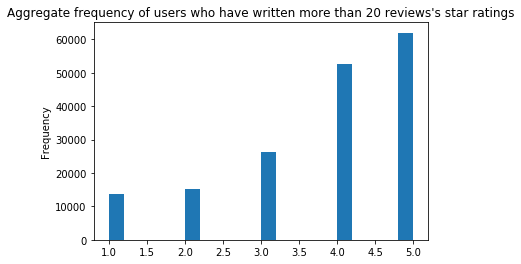

In [26]:
print('USERS WHO HAVE WRITTEN 20 OR MORE REVIEWS')
print('- The number of users who have written more than 20 reviews as a percentage of total reviewers: ' + str(round(len(users_review_count[users_review_count.user_review_count >= 20])/ len(users_review_count)*100, 1)) + '%')
print('- Number of reviews from users who have written more than 20 reviews as a % of total: ' + str(round((reviews[reviews.review_count_user_id >= 20].review_id.count() / reviews.review_id.count())*100, 1)) + '%')
user_20_plus_reviews = reviews[reviews.review_count_user_id >= 20]
print("- Agg. percentage of reviews written by users who have written more than 20 reviews that is a '1' star rating : " + np.around((user_20_plus_reviews['is_it_a_one'].sum() / user_20_plus_reviews['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews written by users who have written more than 20 reviews that is either a '4' or '5': " + np.around((user_20_plus_reviews['is_it_a_four_or_five'].sum() / user_20_plus_reviews['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
user_20_plus_reviews['stars'].plot(kind='hist', bins=20, title = "Aggregate frequency of users who have written more than 20 reviews's star ratings");

In [27]:
# BUSINESSES

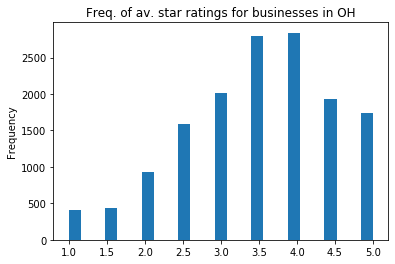

In [28]:
# Aggregate mean ratings rounded 
business.stars.plot(kind='hist', bins=25, title= 'Freq. of av. star ratings for businesses in OH');

In [29]:
business_review_count = pd.DataFrame(reviews.groupby('business_id').business_id.count())
business_review_count.columns = ['business_review_count']
business.reset_index(level=0, inplace=True)
# break out by ranges of the number of reviews written per user
ranges = [0,2,3,5,10,20,50,100,200,500,1000, 3000]
business_review_count.groupby(pd.cut(business_review_count.business_review_count, ranges)).count()

,business_review_count
business_review_count,
"(0, 2]",0
"(2, 3]",3075
"(3, 5]",2734
"(5, 10]",3205
"(10, 20]",2280
"(20, 50]",1926
"(50, 100]",867
"(100, 200]",453
"(200, 500]",129


In [30]:
# BUSINESS SEGMENT 1: BUSINESSES THAT HAVE ONLY BEEN REVIEWED 3 TIMES

- The number of businesses that have been reviewed 3 times as a percentage of total businesses: 22.2%
- The number of reviews for businesses that have been reviewed 3 times as a % of total: 9.4%
- Agg. percentage of reviews for businesses that have been reviewed 3 times  that is a '1' star rating : 28.9%
- Agg. percentage of reviews for businesses that have been reviewed 3 times  that is either a '4' or '5': 58.9%


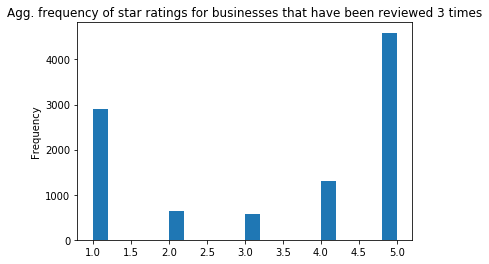

In [31]:
# BUSINESSES THAT HAVE ONLY BEEN REVIEWED 3 TIMES
print('- The number of businesses that have been reviewed 3 times as a percentage of total businesses: ' + str(round(len(business[business.review_count == 3]) / business.review_count.count()*100,1)) + '%')
print('- The number of reviews for businesses that have been reviewed 3 times as a % of total: ' + str(round(len(reviews[reviews.review_count_for_business_id == 3])*3 / reviews.review_count_for_business_id.count()*100,1)) + '%')
businesses_3_reviews = reviews[reviews.review_count_for_business_id == 3]
print("- Agg. percentage of reviews for businesses that have been reviewed 3 times  that is a '1' star rating : " + np.around((businesses_3_reviews['is_it_a_one'].sum() / businesses_3_reviews['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews for businesses that have been reviewed 3 times  that is either a '4' or '5': " + np.around((businesses_3_reviews['is_it_a_four_or_five'].sum() / businesses_3_reviews['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
businesses_3_reviews['stars'].plot(kind='hist', bins=20, title = "Agg. frequency of star ratings for businesses that have been reviewed 3 times");

- The number of businesses that have been reviewed 10 times or less as a percentage of total businesses: 62.3%
- The number of reviews for businesses that have been reviewed 10 times or less as a % of total: 44.3%
- Agg. percentage of reviews for businesses that have been reviewed 10 times or less that had a '1' star rating : 25.1%
- Agg. percentage of reviews for businesses that have been reviewed 10 times or less that had either a '4' or '5': 59.9%


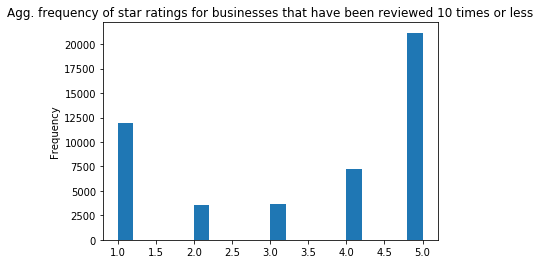

In [42]:
# BUSINESSES THAT HAVE ONLY BEEN REVIEWED 10 TIMES OR LESS
print('- The number of businesses that have been reviewed 10 times or less as a percentage of total businesses: ' + str(round(len(business[business.review_count <= 10]) / business.review_count.count()*100,1)) + '%')
print('- The number of reviews for businesses that have been reviewed 10 times or less as a % of total: ' + str(round(len(reviews[reviews.review_count_for_business_id <= 10])*3 / reviews.review_count_for_business_id.count()*100,1)) + '%')
businesses_3_reviews = reviews[reviews.review_count_for_business_id <=10]
print("- Agg. percentage of reviews for businesses that have been reviewed 10 times or less that had a '1' star rating : " + np.around((businesses_3_reviews['is_it_a_one'].sum() / businesses_3_reviews['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews for businesses that have been reviewed 10 times or less that had either a '4' or '5': " + np.around((businesses_3_reviews['is_it_a_four_or_five'].sum() / businesses_3_reviews['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
businesses_3_reviews['stars'].plot(kind='hist', bins=20, title = "Agg. frequency of star ratings for businesses that have been reviewed 10 times or less");

In [32]:
# BUSINESS SEGMENT 2: BUSINESSES THAT HAVE BEEN REVIEWED 50+ TIMES

- The number of businesses that have been reviewed 50 or more times as a percentage of total businesses: 9.9%
- The number of reviews for businesses that have been reviewed 50 or more times as a % of total: 55.5%
- Agg. percentage of reviews for businesses that have been reviewed 50 or more times that is a '1' star rating : 28.9%
- Agg. percentage of reviews for businesses that have been reviewed 50 or more times  that is either a '4' or '5': 58.9%


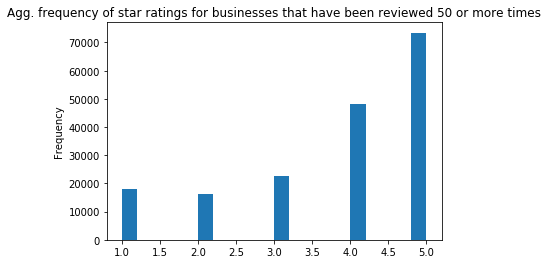

In [33]:
# BUSINESSES THAT HAVE BEEN REVIEWED 50+ TIMES
print('- The number of businesses that have been reviewed 50 or more times as a percentage of total businesses: ' + str(round(len(business[business.review_count >= 50]) / business.review_count.count()*100,1)) + '%')
print('- The number of reviews for businesses that have been reviewed 50 or more times as a % of total: ' + str(round(len(reviews[reviews.review_count_for_business_id >= 50]) / reviews.review_count_for_business_id.count()*100,1)) + '%')
businesses_50_reviews = reviews[reviews.review_count_for_business_id >= 50]
print("- Agg. percentage of reviews for businesses that have been reviewed 50 or more times that is a '1' star rating : " + np.around((businesses_3_reviews['is_it_a_one'].sum() / businesses_3_reviews['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews for businesses that have been reviewed 50 or more times  that is either a '4' or '5': " + np.around((businesses_3_reviews['is_it_a_four_or_five'].sum() / businesses_3_reviews['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
businesses_50_reviews['stars'].plot(kind='hist', bins=20, title = "Agg. frequency of star ratings for businesses that have been reviewed 50 or more times");

In [34]:
# USERS WHO HAVE WRITTEN ONE REVIEW EVER AND THAT REVIEW IS FOR A BUSINESSES THAT HAVE BEEN REVIEWED ONLY THERE TIMES 

- The number of users who have made only one review for businesses that have been reviewed only 3 times as a percentage of total businesses: 0.5%
- The number of reviews for businesses that have been reviewed 3 times as a % of total: 9.4%
- Agg. percentage of reviews for users who have made only one review for businesses that have been reviewed only 3 times and given a '1' star rating : 48.2%
- Agg. percentage of reviews for users who have made only one review for businesses that have been reviewed only 3 times and given a '4' or '5' star rating: 46.3%


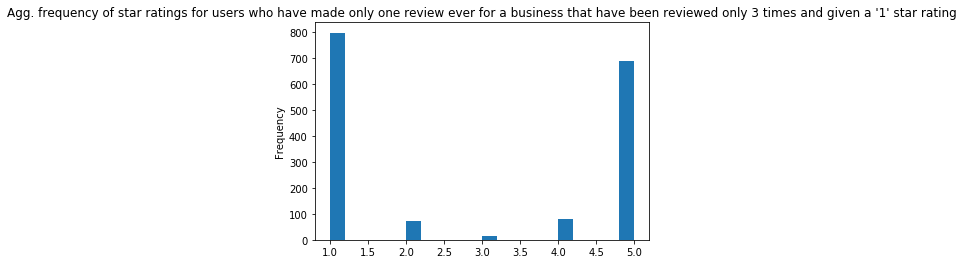

In [35]:
# USERS WHO HAVE WRITTEN ONE REVIEW EVER AND THAT REVIEW IS FOR A BUSINESSES THAT HAVE BEEN REVIEWED ONLY THERE TIMES 
print('- The number of users who have made only one review for businesses that have been reviewed only 3 times as a percentage of total businesses: ' + str(round(len(businesses_3_reviews[businesses_3_reviews.review_count_user_id == 1]) / reviews.review_id.count()*100,1)) + '%')
print('- The number of reviews for businesses that have been reviewed 3 times as a % of total: ' + str(round(len(reviews[reviews.review_count_for_business_id == 3])*3 / reviews.review_count_for_business_id.count()*100,1)) + '%')
business_3_user_1 = businesses_3_reviews[businesses_3_reviews.review_count_user_id == 1]
print("- Agg. percentage of reviews for users who have made only one review for businesses that have been reviewed only 3 times and given a '1' star rating : " + np.around((business_3_user_1['is_it_a_one'].sum() / business_3_user_1['is_it_a_one'].count())*100, decimals = 1).astype(str) + '%')
print("- Agg. percentage of reviews for users who have made only one review for businesses that have been reviewed only 3 times and given a '4' or '5' star rating: " + np.around((business_3_user_1['is_it_a_four_or_five'].sum() / business_3_user_1['is_it_a_four_or_five'].count())*100, decimals = 1).astype(str) + '%')
business_3_user_1['stars'].plot(kind='hist', bins=20, title = "Agg. frequency of star ratings for users who have made only one review ever for a business that have been reviewed only 3 times and given a '1' star rating");

In [36]:
# FIND PERCENTAGE OF REVIEWERS FOR A BUSINESS WHO ARE ELITE REVIEWERS 

In [37]:
# Find count of reviews of elite reviewers by business_id
elite_count = reviews.groupby('business_id').elite_yes_no.sum()
# Find count of reviews of all reviewers by business_id
all_business_count = reviews.groupby('business_id').business_id.count()
# Combine series into a new dataframe 
elite_percent = pd.concat([all_business_count, elite_count], axis=1)
elite_percent.columns = ['biz_review_count', 'elite_biz_review_count']
elite_percent.reset_index()
# Calculate Elite as % of total 
elite_percent['elite_percent'] = round((elite_percent['elite_biz_review_count'] / elite_percent['biz_review_count'])*100, 1)
elite_percent

,biz_review_count,elite_biz_review_count,elite_percent
business_id,,,
--EF5N7P70J_UYBTPypYlA,7,0,0.0
--I7YYLada0tSLkORTHb5Q,100,15,15.0
--Ni3oJ4VOqfOEu7Sj2Vzg,6,0,0.0
--S62v0QgkqQaVUhFnNHrw,43,7,16.3
--i1tTcggBi4cPkd-h5hDg,22,6,27.3
...,...,...,...
zydbdBR6-CM8UZ6WkW1DWA,65,3,4.6
zz6S_y6C39iRU3h81Z1e2A,14,1,7.1
zzSYBWuv_fXGtSgsO-6_1g,200,69,34.5


In [38]:
elite_percent.describe()

,biz_review_count,elite_biz_review_count,elite_percent
count,14697.000000,14697.000000,14697.000000
mean,21.864666,5.933048,23.364449
std,48.753532,16.421520,20.987921
min,3.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,7.000000,2.000000,21.100000
75%,19.000000,5.000000,33.300000
max,1147.000000,424.000000,100.000000


In [39]:
elite_percent.corr()

,biz_review_count,elite_biz_review_count,elite_percent
biz_review_count,1.000000,0.949368,0.080580
elite_biz_review_count,0.949368,1.000000,0.199713
elite_percent,0.080580,0.199713,1.000000


Text(0.5, 1, 'Correlation between review count and elite biz review count by business id')

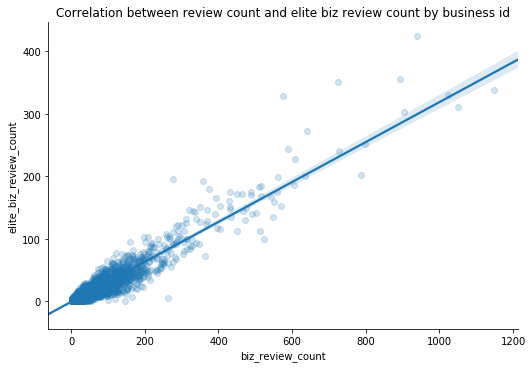

In [40]:
# Check visual correlation between total review count and elite review count by business
sns.lmplot(x='biz_review_count', y='elite_biz_review_count', data=elite_percent, aspect=1.5, scatter_kws={'alpha':0.2});
plt.title('Correlation between review count and elite biz review count by business id')

Text(0.5, 1, 'Correlation between review count and elite biz review count by business id')

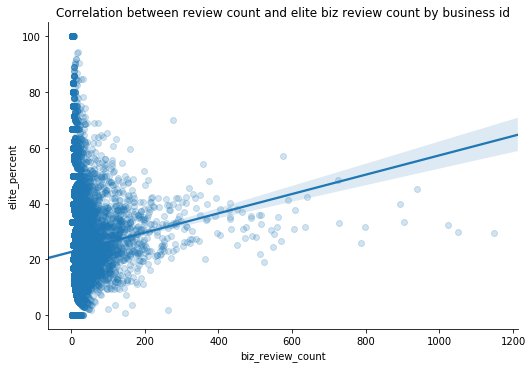

In [41]:
# Check visual correlation between total review count and elite review count by business
sns.lmplot(x='biz_review_count', y='elite_percent', data=elite_percent, aspect=1.5, scatter_kws={'alpha':0.2});
plt.title('Correlation between review count and elite biz review count by business id')

In [42]:
business_20_plus_reviews = reviews[reviews.review_count_for_business_id >= 20]

In [43]:
# Tag reviews with binary is user review count over 20
def user_review_count (z):
    if z >= 20:
        return 1
    else:
        return 0
business_20_plus_reviews['greater_than_user_review_count'] = business_20_plus_reviews['review_count_user_id'].apply(user_review_count)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [44]:
business_20_plus_reviews[reviews.review_count_user_id >= 50].head(1)

/Users/hanhuang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friends,friend_count,count_of_friends_segments,totalwords,elite_yes_no,greater_than_user_review_count
2,8swMTt9IXycp15r3WlCEmg,ITSnuLOu81doC5GGT5NMSQ,RbrZJEf8TlnP7RHaKnCtIQ,3,2,0,1,One day after I satisfy my frozen yogurt cravi...,2013-11-14 04:55:17,2013-11-14 04:55:17,...,5.28,102,444,"2014,2015,2016,2017,2018","ddDS6tAePhaSO07cc6MhdA, jgMcHo1f8vUFWhK0EMnd-w...",298,201+,159,1,1


In [45]:
business_20_plus_reviews['greater_than_user_review_count'].sum()/ len(business_20_plus_reviews)

0.5485314317204169

In [46]:
# LABELING NEEDS TO BE UPDATED

In [47]:
# Find count of reviews of elite reviewers by business_id
twenty_plus_count = user_20_plus_reviews.groupby('business_id').elite_yes_no.sum()

# Find count of reviews of all reviewers by business_id
twenty_all_business_count = user_20_plus_reviews.groupby('business_id').business_id.count()
# Combine series into a new dataframe 
elite_percent = pd.concat([all_business_count, elite_count], axis=1)
elite_percent.columns = ['biz_review_count', 'elite_biz_review_count']
elite_percent.reset_index()
# Calculate Elite as % of total 
elite_percent['elite_percent'] = round((elite_percent['elite_biz_review_count'] / elite_percent['biz_review_count'])*100, 1)
elite_percent

,biz_review_count,elite_biz_review_count,elite_percent
business_id,,,
--EF5N7P70J_UYBTPypYlA,7,0,0.0
--I7YYLada0tSLkORTHb5Q,100,15,15.0
--Ni3oJ4VOqfOEu7Sj2Vzg,6,0,0.0
--S62v0QgkqQaVUhFnNHrw,43,7,16.3
--i1tTcggBi4cPkd-h5hDg,22,6,27.3
...,...,...,...
zydbdBR6-CM8UZ6WkW1DWA,65,3,4.6
zz6S_y6C39iRU3h81Z1e2A,14,1,7.1
zzSYBWuv_fXGtSgsO-6_1g,200,69,34.5


In [48]:
elite_percent.corr()

,biz_review_count,elite_biz_review_count,elite_percent
biz_review_count,1.000000,0.949368,0.080580
elite_biz_review_count,0.949368,1.000000,0.199713
elite_percent,0.080580,0.199713,1.000000


Text(0.5, 1, 'Correlation between review count and elite biz review count by business id')

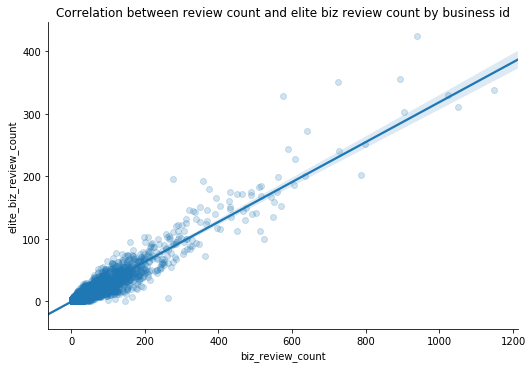

In [49]:
# Check visual correlation between total review count and elite review count by business
sns.lmplot(x='biz_review_count', y='elite_biz_review_count', data=elite_percent, aspect=1.5, scatter_kws={'alpha':0.2});
plt.title('Correlation between review count and elite biz review count by business id')

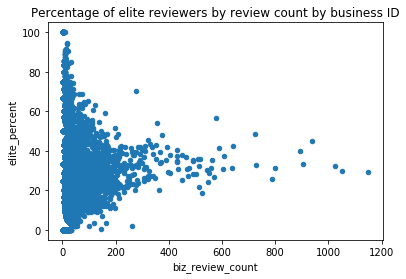

In [50]:
elite_percent.plot(kind='scatter', x='biz_review_count', y='elite_percent', title = 'Percentage of elite reviewers by review count by business ID');

Text(0.5, 1, 'Correlation between review count and elite biz review count by business id')

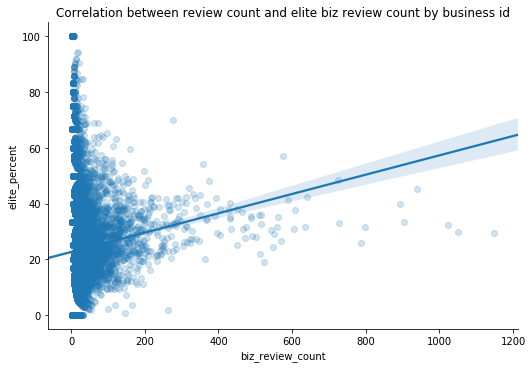

In [51]:
# Check visual correlation between total review count and elite review count by business
sns.lmplot(x='biz_review_count', y='elite_percent', data=elite_percent, aspect=1.5, scatter_kws={'alpha':0.2});
plt.title('Correlation between review count and elite biz review count by business id')

In [52]:
# Prepare Export

In [53]:
reviews.shape

(321345, 43)

In [54]:
reviews.dtypes

review_id                        object
user_id                          object
business_id                      object
stars                             int64
useful                            int64
funny                             int64
cool                              int64
text                             object
date                             object
datetime                         object
year                              int64
is_it_a_one                       int64
is_it_a_five                      int64
is_it_a_one_or_two                int64
is_it_a_four_or_five              int64
is_it_a_one_or_five               int64
name_business_id                 object
city                             object
state                            object
latitude                        float64
longitude                       float64
stars_for_business_id           float64
review_count_for_business_id      int64
is_open                           int64
lat_lon_cluster                   int64


In [55]:
reviews.isnull().sum()

review_id                         0
user_id                           0
business_id                       0
stars                             0
useful                            0
funny                             0
cool                              0
text                              0
date                              0
datetime                          0
year                              0
is_it_a_one                       0
is_it_a_five                      0
is_it_a_one_or_two                0
is_it_a_four_or_five              0
is_it_a_one_or_five               0
name_business_id                  0
city                              0
state                             0
latitude                          0
longitude                         0
stars_for_business_id             0
review_count_for_business_id      0
is_open                           0
lat_lon_cluster                   0
postal_code_str                 154
biz_review_count                  0
biz_star_mean               

In [56]:
reviews.columns.tolist()

['review_id',
 'user_id',
 'business_id',
 'stars',
 'useful',
 'funny',
 'cool',
 'text',
 'date',
 'datetime',
 'year',
 'is_it_a_one',
 'is_it_a_five',
 'is_it_a_one_or_two',
 'is_it_a_four_or_five',
 'is_it_a_one_or_five',
 'name_business_id',
 'city',
 'state',
 'latitude',
 'longitude',
 'stars_for_business_id',
 'review_count_for_business_id',
 'is_open',
 'lat_lon_cluster',
 'postal_code_str',
 'biz_review_count',
 'biz_star_mean',
 'biz_star_min',
 'biz_star_max',
 'biz_star_std',
 'earliest_review',
 'latest_review',
 'earliest_to_latest',
 'earliest_to_latest_years',
 'useful_business_id',
 'review_count_user_id',
 'elite_no_nan',
 'friends',
 'friend_count',
 'count_of_friends_segments',
 'totalwords',
 'elite_yes_no']

In [57]:
# Target: is_it_a_one

In [58]:
# Features:  'latitude', 'longitude', 'review_count_for_business_id',  'is_open', 'review_count_user_id', 'elite_yes_no', 'totalwords' 

In [59]:
reviews[['review_id',
 'user_id',
 'business_id',
 'stars',
 'useful',
 'funny',
 'cool',
 'text',
 'date',
 'datetime',
 'year',
 'is_it_a_one',
 'is_it_a_five',
 'is_it_a_one_or_two',
 'is_it_a_four_or_five',
 'is_it_a_one_or_five',
 'name_business_id',
 'city',
 'state',
 'latitude',
 'longitude',
 'stars_for_business_id',
 'review_count_for_business_id',
 'is_open',
 'lat_lon_cluster',
 'postal_code_str',
 'biz_review_count',
 'biz_star_mean',
 'biz_star_min',
 'biz_star_max',
 'biz_star_std',
 'earliest_review',
 'latest_review',
 'earliest_to_latest',
 'earliest_to_latest_years',
 'useful_business_id',
 'review_count_user_id',
 'elite_no_nan',
 'friend_count',
 'count_of_friends_segments',
 'totalwords',
 'elite_yes_no']]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,...,latest_review,earliest_to_latest,earliest_to_latest_years,useful_business_id,review_count_user_id,elite_no_nan,friend_count,count_of_friends_segments,totalwords,elite_yes_no
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18,2015-01-18 14:04:18,...,2018-05-28 22:26:53,1818 days 03:42:55.000000000,4.98,54,13,0,0,0,263,0
1,1wVA2-vQIuW_ClmXkDxqMQ,86J5DwcFk4f4In1Vxe2TvA,NyLYY8q1-H3hfsTwuwLPCg,4,0,0,0,Great lunch today. Staff was very helpful in a...,2015-01-03 22:47:34,2015-01-03 22:47:34,...,2018-11-11 19:30:36,1460 days 02:01:58.000000000,4.00,522,14,0,0,0,57,0
2,8swMTt9IXycp15r3WlCEmg,ITSnuLOu81doC5GGT5NMSQ,RbrZJEf8TlnP7RHaKnCtIQ,3,2,0,1,One day after I satisfy my frozen yogurt cravi...,2013-11-14 04:55:17,2013-11-14 04:55:17,...,2018-07-04 04:02:49,1927 days 02:58:05.000000000,5.28,102,444,"2014,2015,2016,2017,2018",298,201+,159,1
3,17KSQjHdowZMngVptW_KdA,wvBp1Ar-izuKnI9uBHWufQ,FYkm4c2CujTSPpqSM4TbuQ,5,0,0,0,"Great tanning salon near me, and clean, equipp...",2015-05-12 15:46:57,2015-05-12 15:46:57,...,2017-06-07 04:48:55,1064 days 00:20:10.000000000,2.92,8,12,0,9,1-10,48,0
4,36xxeOr4m4UlRf9FM1HzdA,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1,1,0,0,I took my wife out for a Birthday dinner with ...,2014-12-17 19:34:47,2014-12-17 19:34:47,...,2015-08-22 16:02:49,1379 days 23:16:01.000000000,3.78,28,1,0,0,0,175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321340,hTD-7TLUkt00IQRFI31Wig,XpdfwH4PULIQXGlssV87Rw,Nc8VF2ZbwSUIQ8w2CUJvQw,1,9,1,0,This gym is dirty and cannot be safe. They are...,2016-01-26 01:32:58,2016-01-26 01:32:58,...,2018-11-02 22:04:26,1200 days 02:07:34.000000000,3.29,112,2,0,23,11-50,87,0
321341,lXyLsZCyCpvB1_kAM1qIgQ,BUHWEZrha8Vmb-N9GNV_IQ,31J4jWOrwcaXiYfkoDKNOA,1,2,1,1,We had a terrible experience at this bar last ...,2011-04-17 20:04:26,2011-04-17 20:04:26,...,2011-05-28 11:02:19,2007 days 18:18:57.000000000,5.50,10,6,0,0,0,104,0
321342,30vnT1Vu2vOP-jhtLNATng,ltvT8BcRxrBNDwnfgE8DEQ,Z1mLBp6BMlHSQUh364vk1g,1,1,0,0,Well I have been to the blue point during hap...,2018-10-19 22:38:09,2018-10-19 22:38:09,...,2018-11-13 04:46:36,4731 days 10:24:23.000000000,12.96,244,55,0,0,0,154,0
321343,7bh0zTi1gEJwRCESsxH2Wg,TdbTpjfhOUeTCVBX9evLkw,FvXZcRB8bocNMDvFUnoWhg,5,2,1,1,I have been wanting to try this place and it d...,2018-10-06 02:31:06,2018-10-06 02:31:06,...,2018-11-01 00:27:57,2328 days 02:49:40.000000000,6.38,115,352,"2016,2017,2018",40,11-50,56,1


In [60]:
data_for_model = reviews

In [61]:
# Export
data_for_model.to_csv('./data_for_model.csv')